In [2]:
%load_ext autoreload
%autoreload 2

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12    
import sys 
sys.path.insert(0, '../../mcmc/src/')

import warnings; warnings.simplefilter('ignore')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [48]:
modelA = [10.5, 1.9, 0.2, 0, 0, 0]

modelB = [10.5, 1.9, 0.2, -0.05, 0, 0]

modelC = [10.5, 1.9, 0.2, -0.05, -0.2, 0]

modelD = [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]


In [108]:
model_label_A = "model A: [$\\alpha$="+str(modelA[1])+", $\\sigma_0$="+str(modelA[2])+"]"

model_label_B = "model B: [$\\alpha$="+str(modelB[1])+", $\\sigma_0$="+str(modelB[2])+", $\\gamma$="+str(modelB[3])+"]"

model_label_C = "model C: [$\\alpha$="+str(modelC[1])+", $\\sigma_0$="+str(modelC[2])+", $\\gamma$="+str(modelC[3])+ ", $\\beta$="+str(modelC[4]) + "]"

model_label_D = "model D: [$\\alpha$="+str(modelD[1])+", $\\sigma_0$="+str(modelD[2])+", $\\gamma$="+str(modelD[3])+ ", $\\beta$="+str(modelD[4]) + ", $\\tau$="+str(modelD[5]) + "]"


In [109]:
mass_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["mass"]
red_example = np.load("../../../data/MW-analog/meta_data_psi4/models.npz")["redshift"]

mass_example = np.vstack(mass_example)
red_example = np.vstack(red_example)

In [162]:
def plot_twostat(data, model_label, save_file):

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figsize as needed
    plt.suptitle(model_label, fontsize=15, color="black")

    # Plot the first graph on the left subplot
    axs[0].plot(np.arange(data.Pnsat.shape[0]), data.Pnsat, color="cornflowerblue", marker=".")
    axs[0].set_xlabel("N sat with log m$_*$ > " + str(data.min_mass), fontsize=15)
    axs[0].set_ylabel("PDF", fontsize=15)
    axs[0].set_xlim(0, 25)
    axs[0].set_ylim(-0.01,0.26)

    # Plot the second graph on the right subplot
    axs[1].plot(data.Msmax, data.ecdf_MsMax, color="cornflowerblue")
    axs[1].set_xlabel("MAX (log m$_*$) [M$_{\odot}}$]", fontsize=15)
    axs[1].set_ylabel("CDF", fontsize=15)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    # Show the plot

    if save_file !=None:
        plt.savefig("../../../SatGen/figures/paper/"+save_file)

    plt.show()

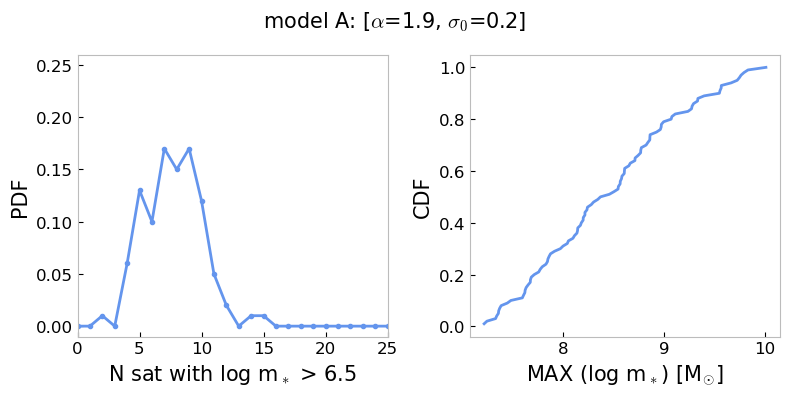

In [163]:
dataA = jsm_models.init_data(modelA, "../../mcmc/model_runs/data/mock_A.npy")

dataA.get_stats(min_mass=6.5, plot=False)
dataA.get_data_points(plot=False)

plot_twostat(dataA.stat, model_label_A, save_file="stat_A.png")


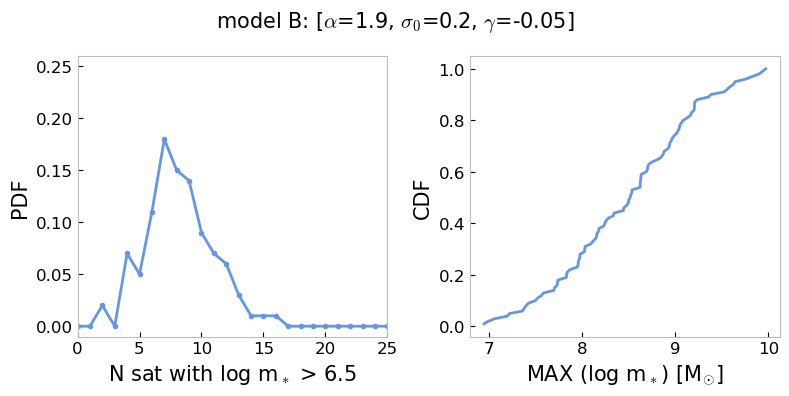

In [164]:
dataB = jsm_models.init_data(modelB, "../../mcmc/model_runs/data/mock_B.npy")

dataB.get_stats(min_mass=6.5, plot=False)
dataB.get_data_points(plot=False)

plot_twostat(dataB.stat, model_label_B, save_file="stat_B.png")


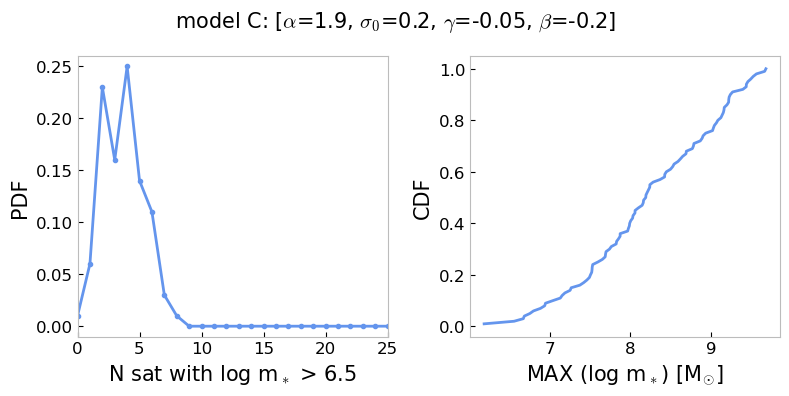

In [165]:
dataC = jsm_models.init_data(modelC, "../../mcmc/model_runs/data/mock_C.npy")

dataC.get_stats(min_mass=6.5, plot=False)
dataC.get_data_points(plot=False)

plot_twostat(dataC.stat, model_label_C, save_file="stat_C.png")


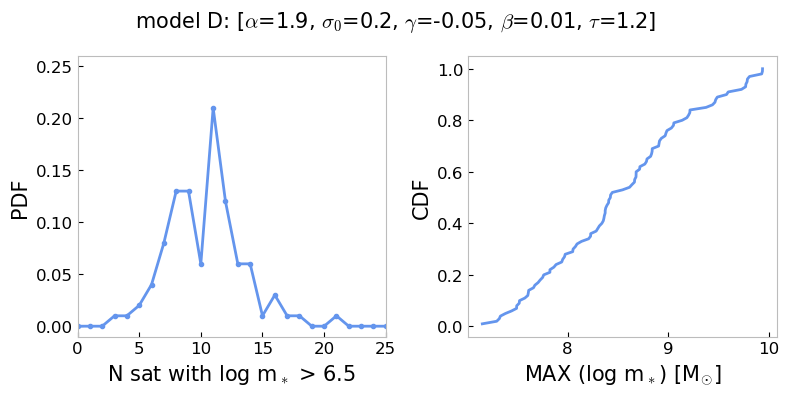

In [166]:
dataD = jsm_models.init_data(modelD, "../../mcmc/model_runs/data/mock_D.npy")

dataD.get_stats(min_mass=6.5, plot=False)
dataD.get_data_points(plot=False)

plot_twostat(dataD.stat, model_label_D, save_file="stat_D.png")


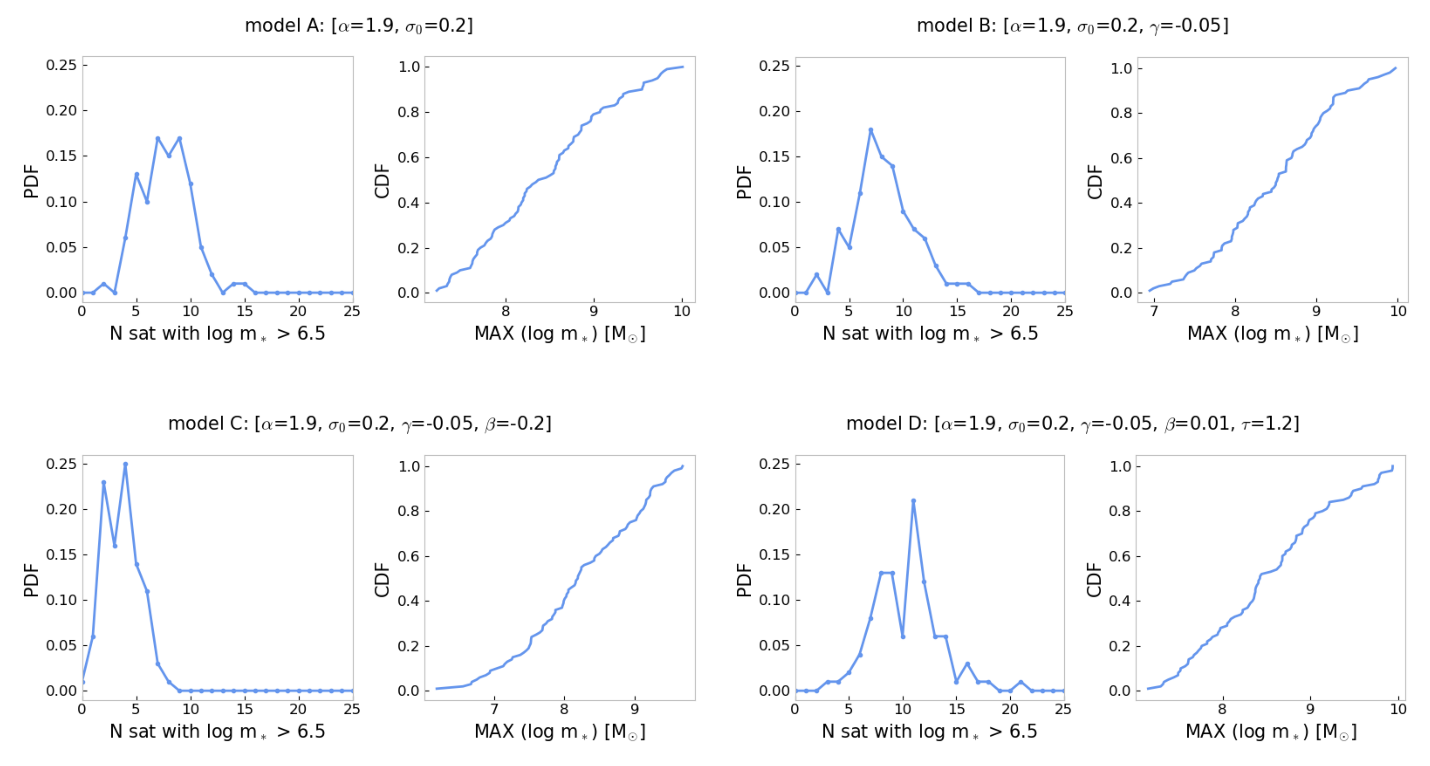

In [167]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def create_2x2_grid(images):
    fig, axs = plt.subplots(2, 2, figsize=(12,10))

    for i in range(2):
        for j in range(2):
            img = mpimg.imread(images[i * 2 + j])
            axs[i, j].imshow(img)
            axs[i, j].axis('off')
    fig.set_in_layout(False)
    plt.tight_layout(rect=[0, 0, 1.2, 0.95])
    plt.show() 

datadir = "../../../SatGen/figures/paper/"

if __name__ == "__main__":
    # Replace these file paths with your own PNG files
    image_paths = [datadir+"stat_A.png", datadir+"stat_B.png", datadir+"stat_C.png", datadir+"stat_D.png"]

    create_2x2_grid(image_paths)


In [127]:
def plot_twostat_multi(dataz):

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Adjust the figsize as needed

    for i in dataz:
        # Plot the first graph on the left subplot
        axs[0].plot(np.arange(i.Pnsat.shape[0]), i.Pnsat)
        axs[0].set_xlabel("N sat > $10^{" + str(i.min_mass) + "} \mathrm{M_{\odot}}$", fontsize=15)
        axs[0].set_ylabel("PDF", fontsize=15)
        axs[0].set_xlim(0, 25)
        axs[0].set_ylim(-0.01,0.26)

        # Plot the second graph on the right subplot
        axs[1].plot(i.Msmax, i.ecdf_MsMax)
        axs[1].set_xlabel("MAX (log m$_*$) [$M_{\odot}}$]", fontsize=15)
        axs[1].set_ylabel("CDF", fontsize=15)

    # Adjust layout to prevent clipping of labels
    plt.tight_layout()
    # Show the plot
    plt.show()

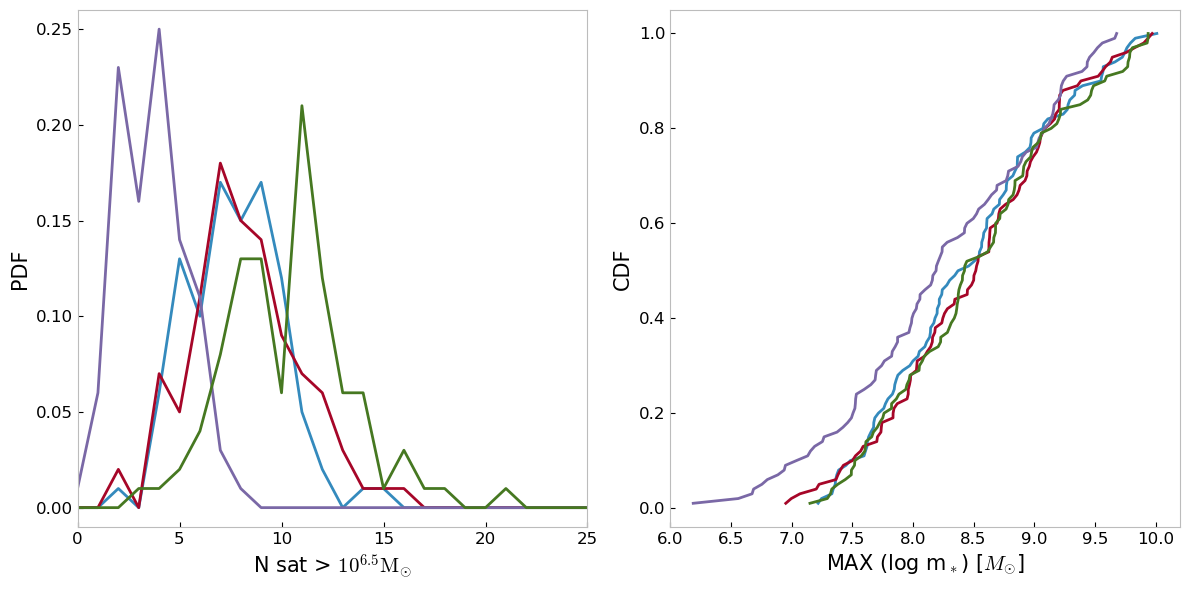

In [128]:
plot_twostat_multi([dataA.stat, dataB.stat, dataC.stat, dataD.stat])